In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Collection and Loss Reverse Forecast\data_preparation\EDA\Univariate_bivariate_multivariate\Univariate_Analysis\new_kolektor.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1000 non-null   int64  
 1   time_to_collect        1000 non-null   int64  
 2   avg_bill_methods       1000 non-null   object 
 3   debtor_volume_handled  1000 non-null   int64  
 4   bill_amount_collected  1000 non-null   int64  
 5   total_actual           1000 non-null   int64  
 6   total_cost             1000 non-null   int64  
 7   success_rate           1000 non-null   float64
dtypes: float64(1), int64(6), object(1)
memory usage: 62.6+ KB


In [3]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [4]:
df.head()

,time_to_collect,avg_bill_methods,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate
0,0,sms or WA,7,14400000,35700000,277706,40.0
1,11,panggilan,35,79000000,160500000,22382611,49.0
2,4,sms or WA,6,7100000,26700000,205389,27.0
3,29,datang ke tempat,63,782000000,1395000000,482942548,56.0
4,22,datang ke tempat,35,346000000,485500000,151035603,71.0


In [5]:
bill_methods = {"sms or WA": 0, "surat panggilan": 1, "panggilan": 2, "datang ke tempat": 3}
columns = {"avg_bill_methods": bill_methods}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object":
        df[i] = [columns[i][j] for j in df[i]]

             
scaler = RobustScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,time_to_collect,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate,avg_bill_methods
0,-1.000000,-1.347826,-0.459398,-0.520698,-0.252668,-0.363636,0
1,-0.266667,-0.130435,-0.282327,-0.344973,-0.162494,-0.159091,2
2,-0.733333,-1.391304,-0.479408,-0.533371,-0.252963,-0.659091,0
3,0.933333,1.086957,1.644624,1.393270,1.716301,0.000000,3
4,0.466667,-0.130435,0.449531,0.112644,0.362330,0.340909,3


In [6]:
X = df2.drop("total_cost", axis=1)
y = df["total_cost"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_train.shape

((800, 6), (200, 6), (800,), (800,))

In [7]:
model = BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor()

In [8]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 11296005954994746.00
      Mean Absolute Error : 63462141.01
      Mean Absolute Percentage Error : 0.54
      Root Mean Squared Error : 0.54
      R_Squared : 0.63
      


In [9]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [10]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 21141173971780896.00
      Mean Absolute Error : 85927337.61
      Mean Absolute Percentage Error : 0.67
      Root Mean Squared Error : 0.67
      R_Squared : 0.31
      


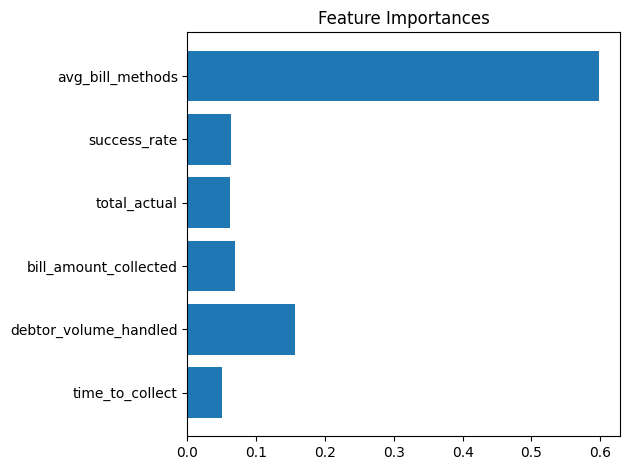

In [11]:
plt.barh(X_train.columns, model.feature_importances_)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

In [12]:
X_train_new, X_test_new = X_train.drop("avg_bill_methods", axis=1), X_test.drop("avg_bill_methods", axis=1)

model.fit(X_train_new, y_train)

DecisionTreeRegressor()

In [14]:
y_pred = model.predict(X_test_new)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 20206643158221416.00
      Mean Absolute Error : 85332671.25
      Mean Absolute Percentage Error : 0.66
      Root Mean Squared Error : 0.66
      R_Squared : 0.34
      


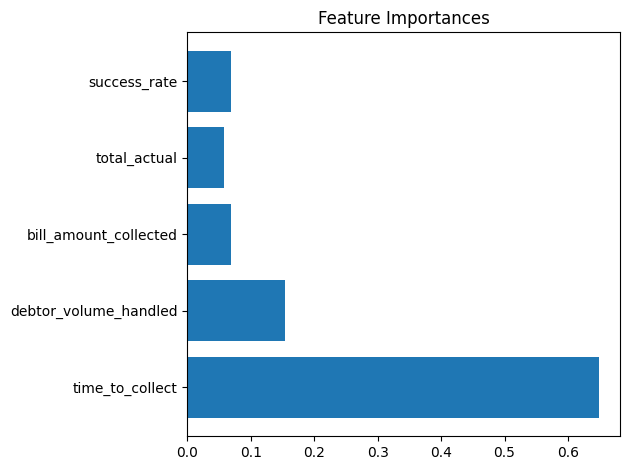

In [15]:
plt.barh(X_train_new.columns, model.feature_importances_)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 12823718089224734.00
      Mean Absolute Error : 90636680.26
      Mean Absolute Percentage Error : 77.49
      Root Mean Squared Error : 77.49
      R_Squared : 0.58
      


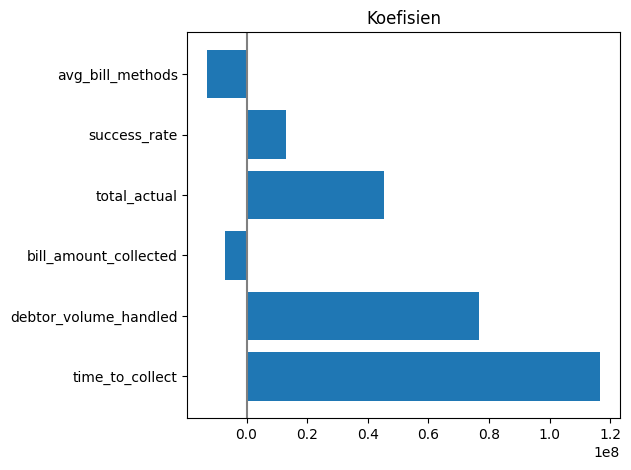

In [19]:
plt.barh(X_train.columns, model.coef_)
plt.title("Koefisien")
plt.axvline(x=0, color=".5")
plt.tight_layout()
plt.show()

In [20]:
n_samples = len(df)
n_features = len(df.columns)
params = {'base_estimator': [None, LinearRegression(), DecisionTreeRegressor()],
          'n_estimators': [20,50,100],
          'max_samples': [0.5,1.0, n_samples//2,],
          'max_features': [0.5,1.0, n_features//2,],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(cv=3, estimator=BaggingRegressor(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'base_estimator': [None, LinearRegression(),
                                            DecisionTreeRegressor()],
                         'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.5, 1.0, 3],
                         'max_samples': [0.5, 1.0, 500],
                         'n_estimators': [20, 50, 100]},
             verbose=1)

In [21]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 12823718089224734.00
      Mean Absolute Error : 90636680.26
      Mean Absolute Percentage Error : 77.49
      Root Mean Squared Error : 77.49
      R_Squared : 0.58
      
